In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import seaborn as sns

In [2]:
# Attributes
causes_of_death = ['All deaths', 'A00-B99 Infectious and parasitic diseases', 'C00-D48 Neoplasms',
                   'D50-D89 Diseases of the blood and bloodforming organs and certain disorders involving the immune mechanism',
                   'E00-E90 Endocrine, nutritional and metabolic diseases', 'F00-F99 Mental and behavioural disorders',
                   'G00-G99 Diseases of the nervous system', 'H00-H59 Diseases of the eye and adnexa',
                   'H60-H95 Diseases of the ear and mastoid process', 'I00-I99 Diseases of the circulatory system',
                   'J00-J99 Diseases of the respiratory system', 'K00-K93 Diseases of the digestive system',
                   'L00-L99 Diseases of the skin and subcutaneous tissue',
                   'M00-M99 Diseases of musculoskeletal system and connective tissue',
                   'N00-N99 Diseases of genitourinary system',
                   'O00-O99 Complicatons of pregnancy, childbirth and puerperium',
                   'P00-P96 Certain conditions originating in the perinatal period',
                   'Q00-Q99 Congenital malformations, deformations and chromosomal abnormalities',
                   'R00-R99 Symptoms, signs and abnormal clinical and laboratory findings n.e.c.',
                   'U00 – U49 Provisional assignment of new diseases of uncertain etiology or emergency use',
                   'V00-Y98 External causes of injury and poisoning']

years = ['2017', '2018', '2019', '2020', '2021', '2022']

In [3]:
df = pd.read_csv('../data/MortalityIndicators.csv')
df.drop(columns=['Sex', 'Statistic', 'UNIT'], inplace=True)  # Statistic is deaths per 100,000 people
df.head()

,Ethnicity,Cause of Death,Age Group,2017,2018,2019,2020,2021,2022
0,All ethnic or cultural backgrounds,All deaths,All ages,655.0,666.0,666.0,686.0,719.0,723.0
1,All ethnic or cultural backgrounds,All deaths,Under 5 years,78.0,69.0,72.0,73.0,76.0,74.0
2,All ethnic or cultural backgrounds,All deaths,5 - 19 years,13.0,14.0,15.0,14.0,13.0,14.0
3,All ethnic or cultural backgrounds,All deaths,20 - 39 years,66.0,68.0,67.0,68.0,64.0,57.0
4,All ethnic or cultural backgrounds,All deaths,40 - 64 years,325.0,335.0,333.0,328.0,345.0,323.0


In [4]:
df.isnull().sum()

Ethnicity           0
Cause of Death      0
Age Group           0
2017              420
2018              420
2019              420
2020              420
2021              420
2022              420
dtype: int64

The null values here come solely from the ethnic background 'Unknown ethnic or cultural background' and the age group 'All Ages'.  
We will drop these rows as nothing useful can be inferred since there is no data and we are concerned with age groups and ethnicities.

In [5]:
df = df.dropna()
df.isnull().sum()

Ethnicity         0
Cause of Death    0
Age Group         0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
dtype: int64

## Analysing the causes of death for elderly populations against non-elderly populations

In [6]:
# Filter by elderly or not for all ethnicities
elderly_df = df[df['Age Group'] == '65 years and over']
elderly_df = elderly_df[elderly_df['Ethnicity'] == 'All ethnic or cultural backgrounds']
non_elderly_df = df[df['Age Group'] == '64 years and under']
non_elderly_df = non_elderly_df[non_elderly_df['Ethnicity'] == 'All ethnic or cultural backgrounds']

# Group by cause of death
elderly_grouped = elderly_df.groupby('Cause of Death')
non_elderly_grouped = non_elderly_df.groupby('Cause of Death')

elderly_grouped.head()

,Ethnicity,Cause of Death,Age Group,2017,2018,2019,2020,2021,2022
11,All ethnic or cultural backgrounds,All deaths,65 years and over,3930.0,3882.0,3788.0,3837.0,3936.0,3924.0
23,All ethnic or cultural backgrounds,A00-B99 Infectious and parasitic diseases,65 years and over,34.0,36.0,32.0,33.0,32.0,41.0
35,All ethnic or cultural backgrounds,C00-D48 Neoplasms,65 years and over,1103.0,1090.0,1106.0,1079.0,1047.0,1063.0
47,All ethnic or cultural backgrounds,D50-D89 Diseases of the blood and bloodforming...,65 years and over,13.0,11.0,13.0,11.0,10.0,12.0
59,All ethnic or cultural backgrounds,"E00-E90 Endocrine, nutritional and metabolic d...",65 years and over,106.0,102.0,94.0,110.0,108.0,109.0
71,All ethnic or cultural backgrounds,F00-F99 Mental and behavioural disorders,65 years and over,272.0,292.0,284.0,251.0,256.0,271.0
83,All ethnic or cultural backgrounds,G00-G99 Diseases of the nervous system,65 years and over,210.0,213.0,201.0,199.0,207.0,207.0
95,All ethnic or cultural backgrounds,H00-H59 Diseases of the eye and adnexa,65 years and over,0.0,0.0,0.0,0.0,1.0,0.0
107,All ethnic or cultural backgrounds,H60-H95 Diseases of the ear and mastoid process,65 years and over,0.0,0.0,0.0,0.0,0.0,1.0
119,All ethnic or cultural backgrounds,I00-I99 Diseases of the circulatory system,65 years and over,1231.0,1214.0,1160.0,1102.0,1122.0,1159.0


#### Graphing Deaths per 100,000 over time for elderly and non-elderly populations

Comparison of deaths per 100,000 by cause for elderly and non-elderly


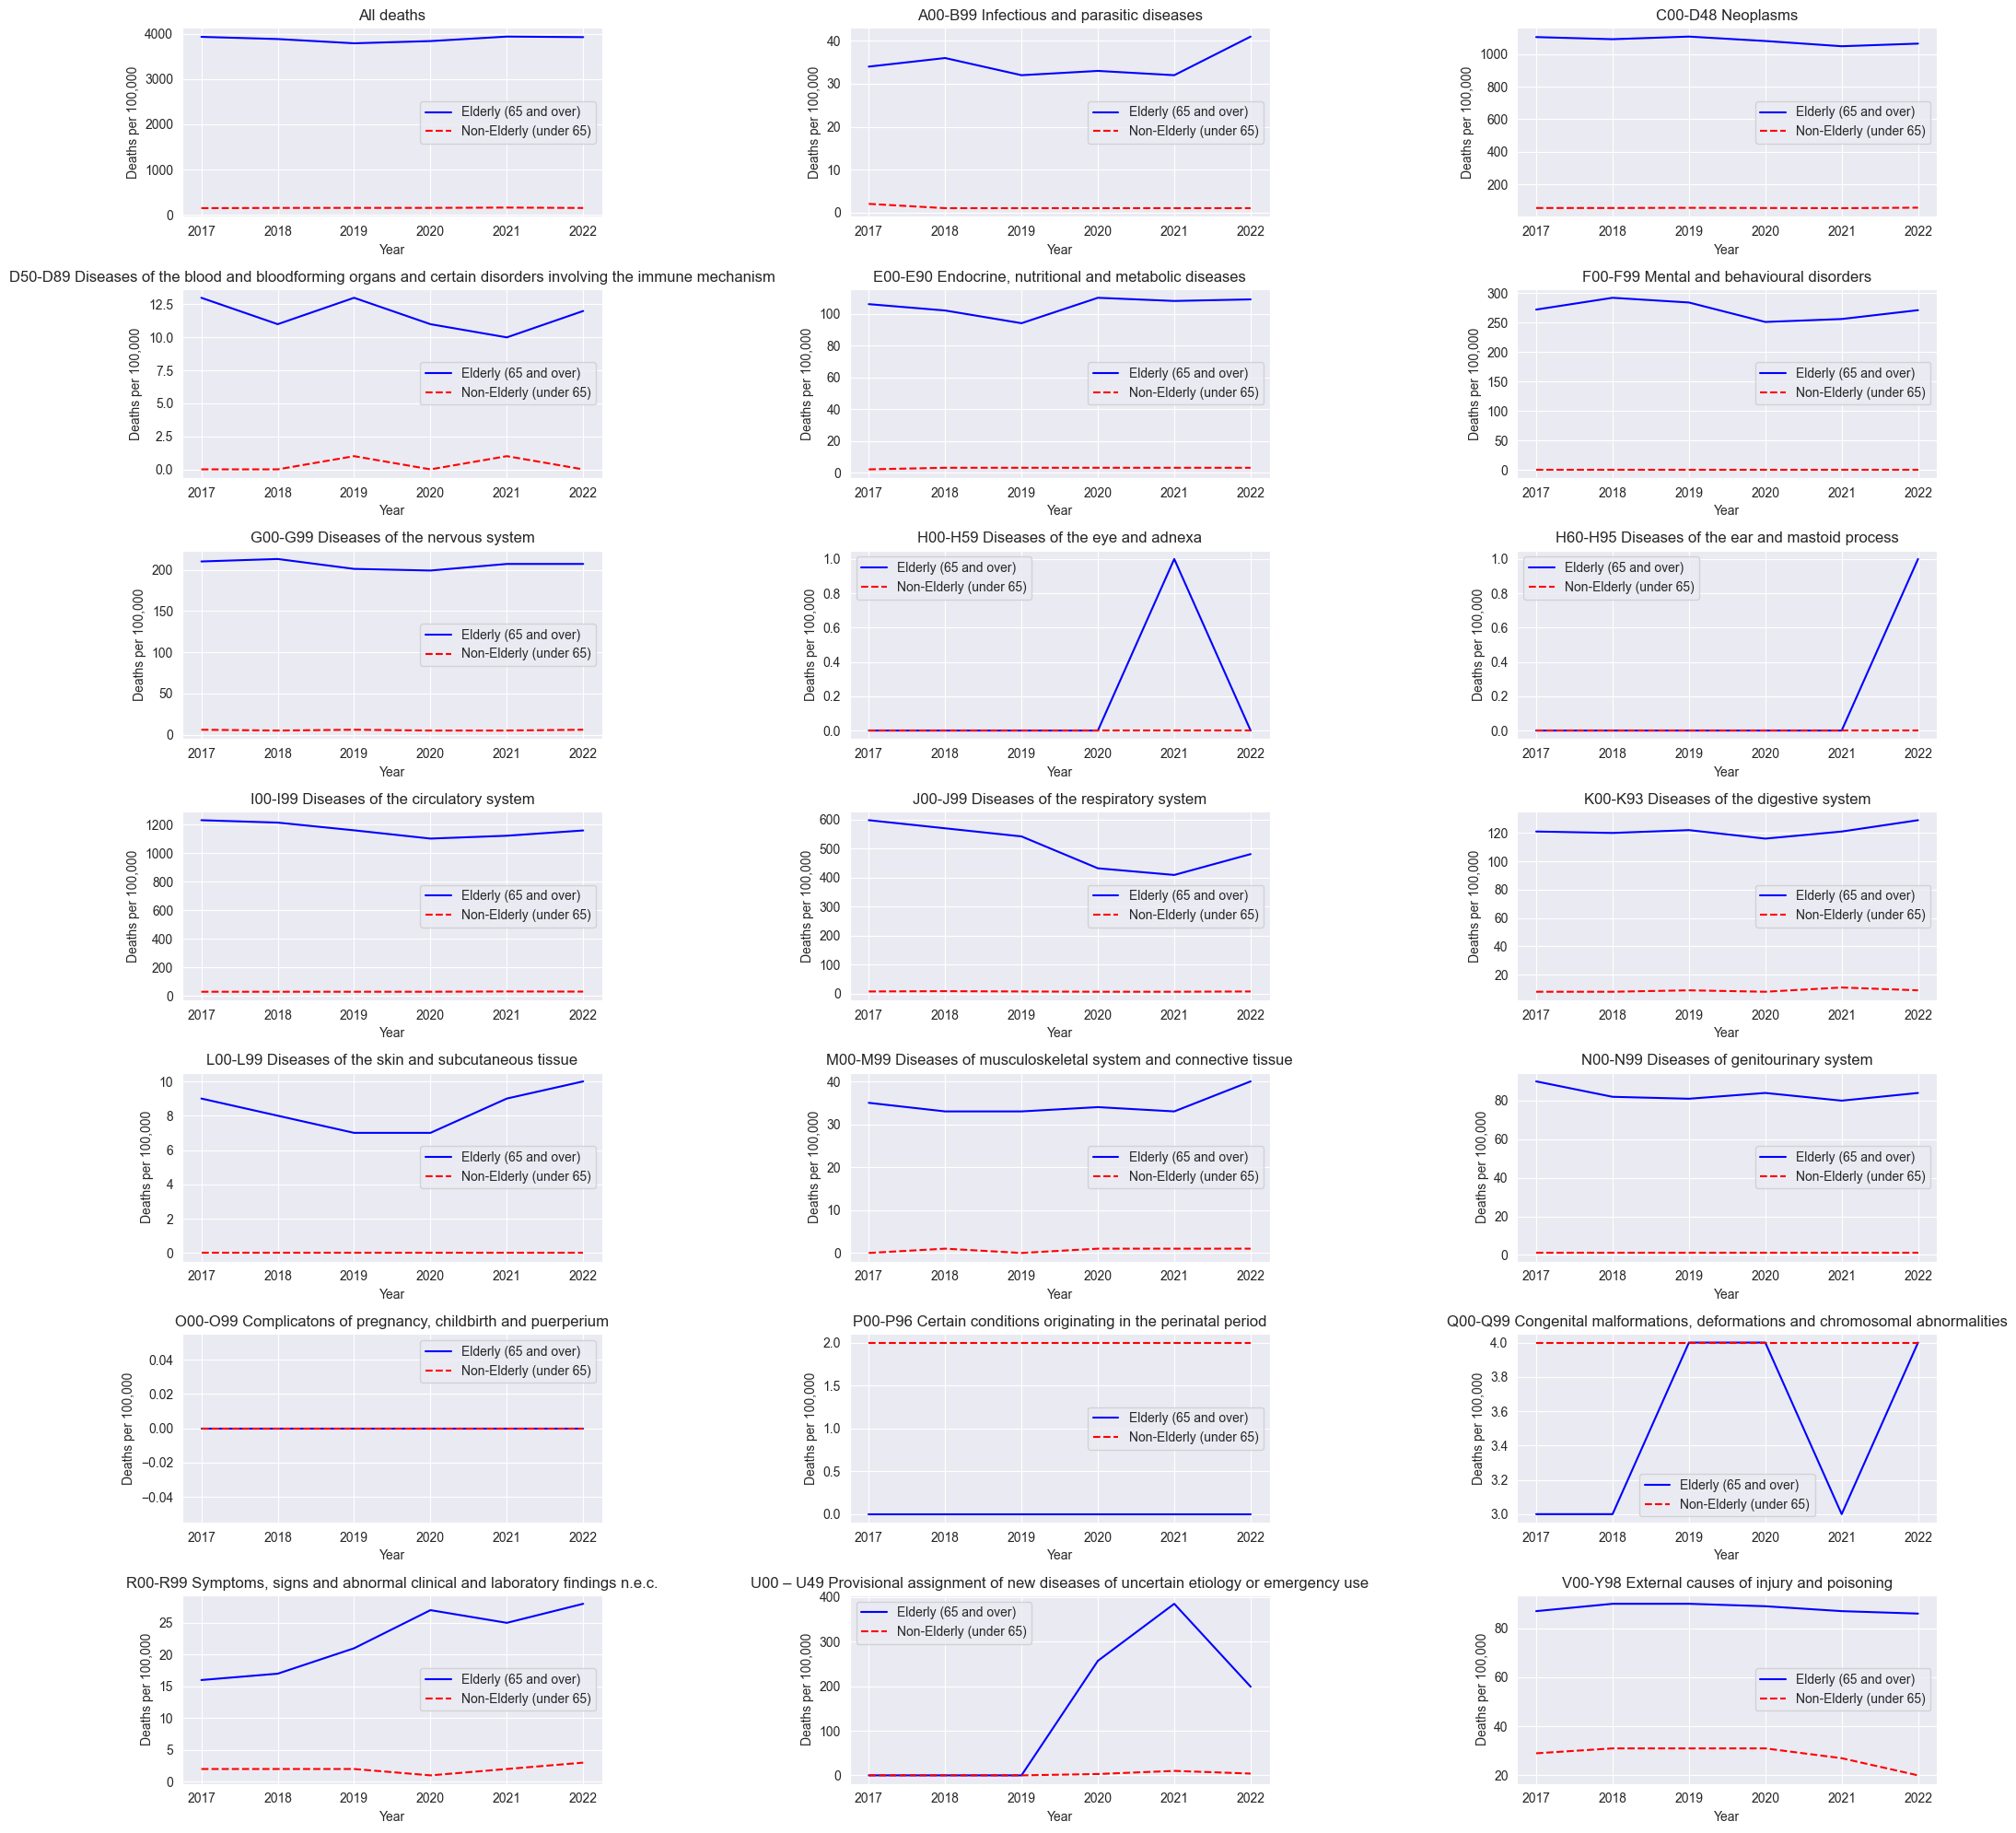

In [7]:
fig, axes = plt.subplots(len(causes_of_death) // 3, 3, figsize=(20, 20))
axes = axes.flatten()

for idx, cause in enumerate(causes_of_death):
    elderly_cause_df = elderly_df[elderly_df['Cause of Death'] == cause]
    non_elderly_cause_df = non_elderly_df[non_elderly_df['Cause of Death'] == cause]
    
    elderly_deaths = elderly_cause_df[years].values.flatten()
    non_elderly_deaths = non_elderly_cause_df[years].values.flatten()
    
    ax = axes[idx]
    ax.plot(years, elderly_deaths, label='Elderly (65 and over)', color='blue')
    ax.plot(years, non_elderly_deaths, label='Non-Elderly (under 65)', color='red', linestyle='--')
    ax.set_title(cause)
    ax.set_ylabel('Deaths per 100,000')
    ax.set_xlabel('Year')
    ax.legend()

print('Comparison of deaths per 100,000 by cause for elderly and non-elderly')
plt.tight_layout(w_pad=15.0)
plt.show()

#### Visualising relative mortality ratios (elderly death rate / non-elderly death rate)

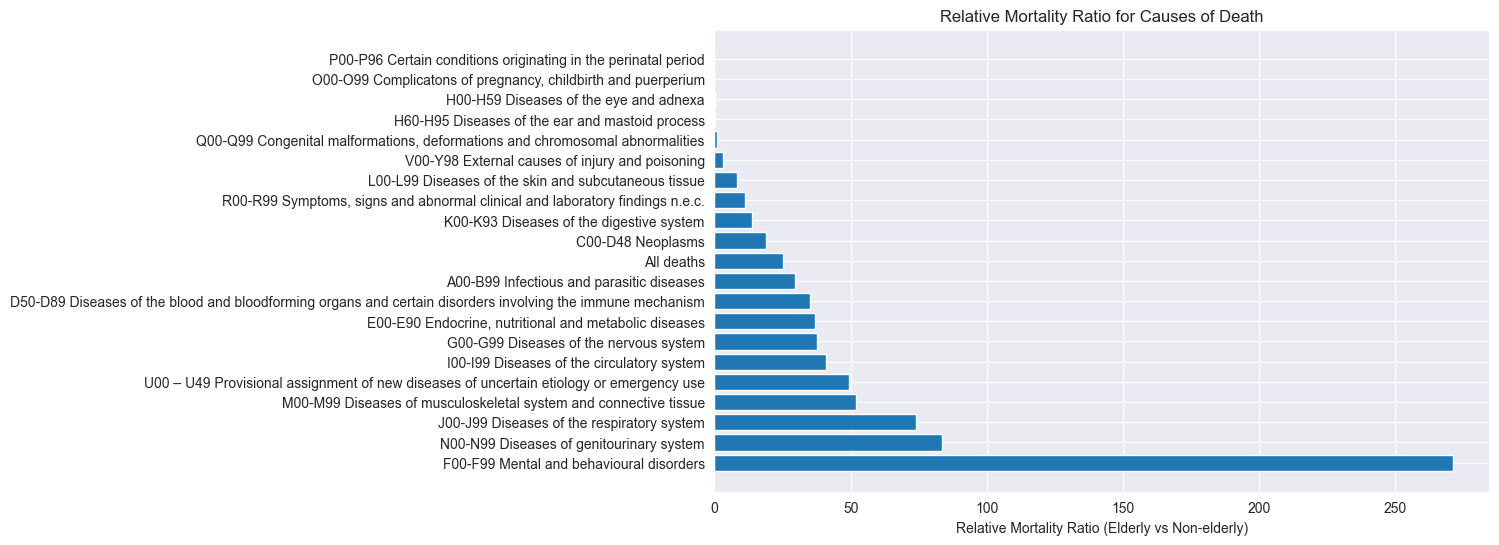

                                       Cause of Death         RMR
5            F00-F99 Mental and behavioural disorders  271.000000
14           N00-N99 Diseases of genitourinary system   83.500000
10         J00-J99 Diseases of the respiratory system   73.951220
13  M00-M99 Diseases of musculoskeletal system and...   52.000000
19  U00 – U49 Provisional assignment of new diseas...   49.470588
9          I00-I99 Diseases of the circulatory system   40.865497
6              G00-G99 Diseases of the nervous system   37.484848
4   E00-E90 Endocrine, nutritional and metabolic d...   37.000000
3   D50-D89 Diseases of the blood and bloodforming...   35.000000
1           A00-B99 Infectious and parasitic diseases   29.714286
0                                          All deaths   25.267896
2                                   C00-D48 Neoplasms   18.860465
11           K00-K93 Diseases of the digestive system   13.754717
18  R00-R99 Symptoms, signs and abnormal clinical ...   11.166667
12  L00-L9

In [8]:
# Visualising relative mortality ratios by mean deaths for all years
relative_mortality_ratios = []

for cause in causes_of_death:
    elderly_cause_df = elderly_df[elderly_df['Cause of Death'] == cause]
    non_elderly_cause_df = non_elderly_df[non_elderly_df['Cause of Death'] == cause]
    
    elderly_deaths = elderly_cause_df[years].mean(axis=1).values.flatten()
    non_elderly_deaths = non_elderly_cause_df[years].mean(axis=1).values.flatten()
    
    rmr = 0
    if (non_elderly_deaths == 0):
        rmr = elderly_deaths
    else:
        rmr = elderly_deaths / non_elderly_deaths
    relative_mortality_ratios.append((cause, rmr.mean()))

rmr_df = pd.DataFrame(relative_mortality_ratios, columns=['Cause of Death', 'RMR'])
rmr_df_sorted = rmr_df.sort_values(by='RMR', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rmr_df_sorted['Cause of Death'], rmr_df_sorted['RMR'])
plt.xlabel('Relative Mortality Ratio (Elderly vs Non-elderly)')
plt.title('Relative Mortality Ratio for Causes of Death')
plt.show()

print(rmr_df_sorted)

#### Checking for statistically significant differences in rates of death per cause of death in elderly and non-elderly populations

In [9]:
# Checking if differences are statistically significant
print(f'{'Cause of Death:':<120}{'Significant Difference?:':<40}{'P-value:':<10}')

for cause in causes_of_death:
    elderly_cause_df = elderly_df[elderly_df['Cause of Death'] == cause]
    non_elderly_cause_df = non_elderly_df[non_elderly_df['Cause of Death'] == cause]
    
    elderly_deaths = elderly_cause_df[years].values.flatten()
    non_elderly_deaths = non_elderly_cause_df[years].values.flatten()

    stat, p_value = mannwhitneyu(elderly_deaths, non_elderly_deaths)
    if p_value < 0.05: # threshold for significance
        result = 'Significant difference'
    else:
        result = 'No significant difference'
        
    print(f"{cause:<120}{result:<40}{p_value:<10.10f}")

Cause of Death:                                                                                                         Significant Difference?:                P-value:  
All deaths                                                                                                              Significant difference                  0.0049981248
A00-B99 Infectious and parasitic diseases                                                                               Significant difference                  0.0036009151
C00-D48 Neoplasms                                                                                                       Significant difference                  0.0047718217
D50-D89 Diseases of the blood and bloodforming organs and certain disorders involving the immune mechanism              Significant difference                  0.0041283166
E00-E90 Endocrine, nutritional and metabolic diseases                                                                   Significant diffe

#### Assessing stability and variance in death rates for elderly populations by cause of death

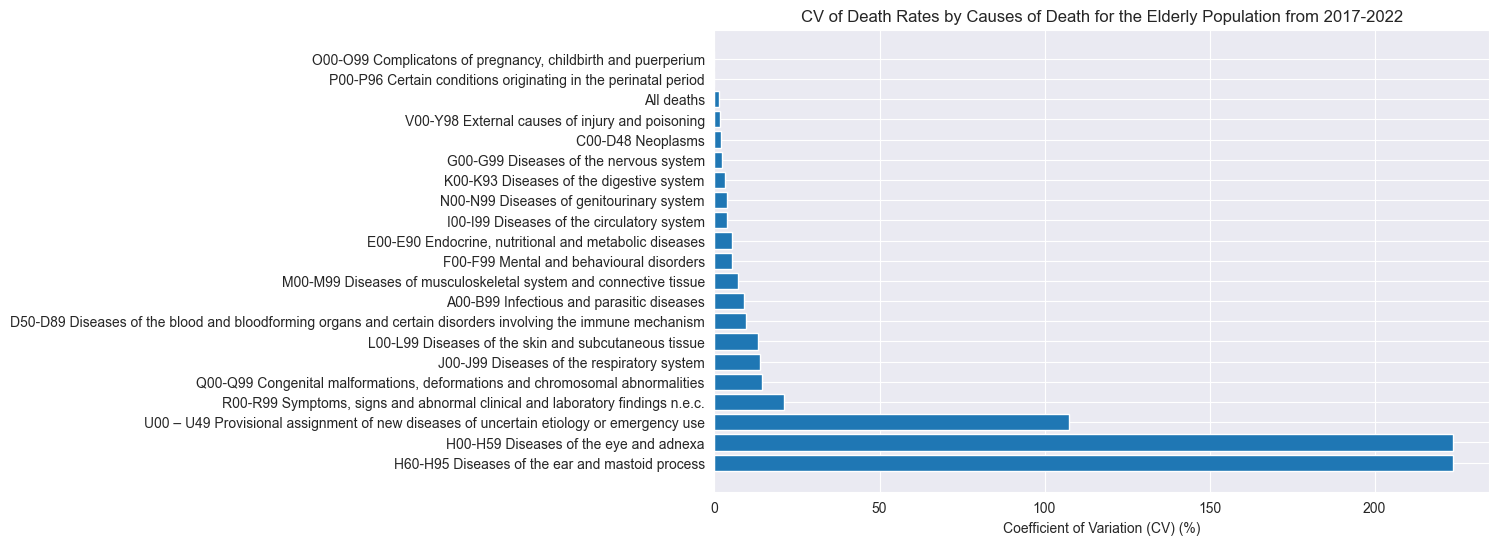

In [10]:
elderly_df_cvs = []

for cause in causes_of_death:
    elderly_cause_df = elderly_df[elderly_df['Cause of Death'] == cause]
    elderly_deaths = elderly_cause_df[years].values.flatten()
    
    std = np.std(elderly_deaths)
    mean = np.mean(elderly_deaths)
    cv = 0
    if mean != 0:
        cv = std / mean * 100

    elderly_df_cvs.append((cause, cv))

elderly_cv_df = pd.DataFrame(elderly_df_cvs, columns=['Cause of Death', 'CV'])
elderly_cv_df = elderly_cv_df.sort_values(by='CV', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(elderly_cv_df['Cause of Death'], elderly_cv_df['CV'])
plt.xlabel('Coefficient of Variation (CV) (%)')
plt.title('CV of Death Rates by Causes of Death for the Elderly Population from 2017-2022')
plt.show()

#### Visualising severity of causes of death by highest death rates for elderly populations

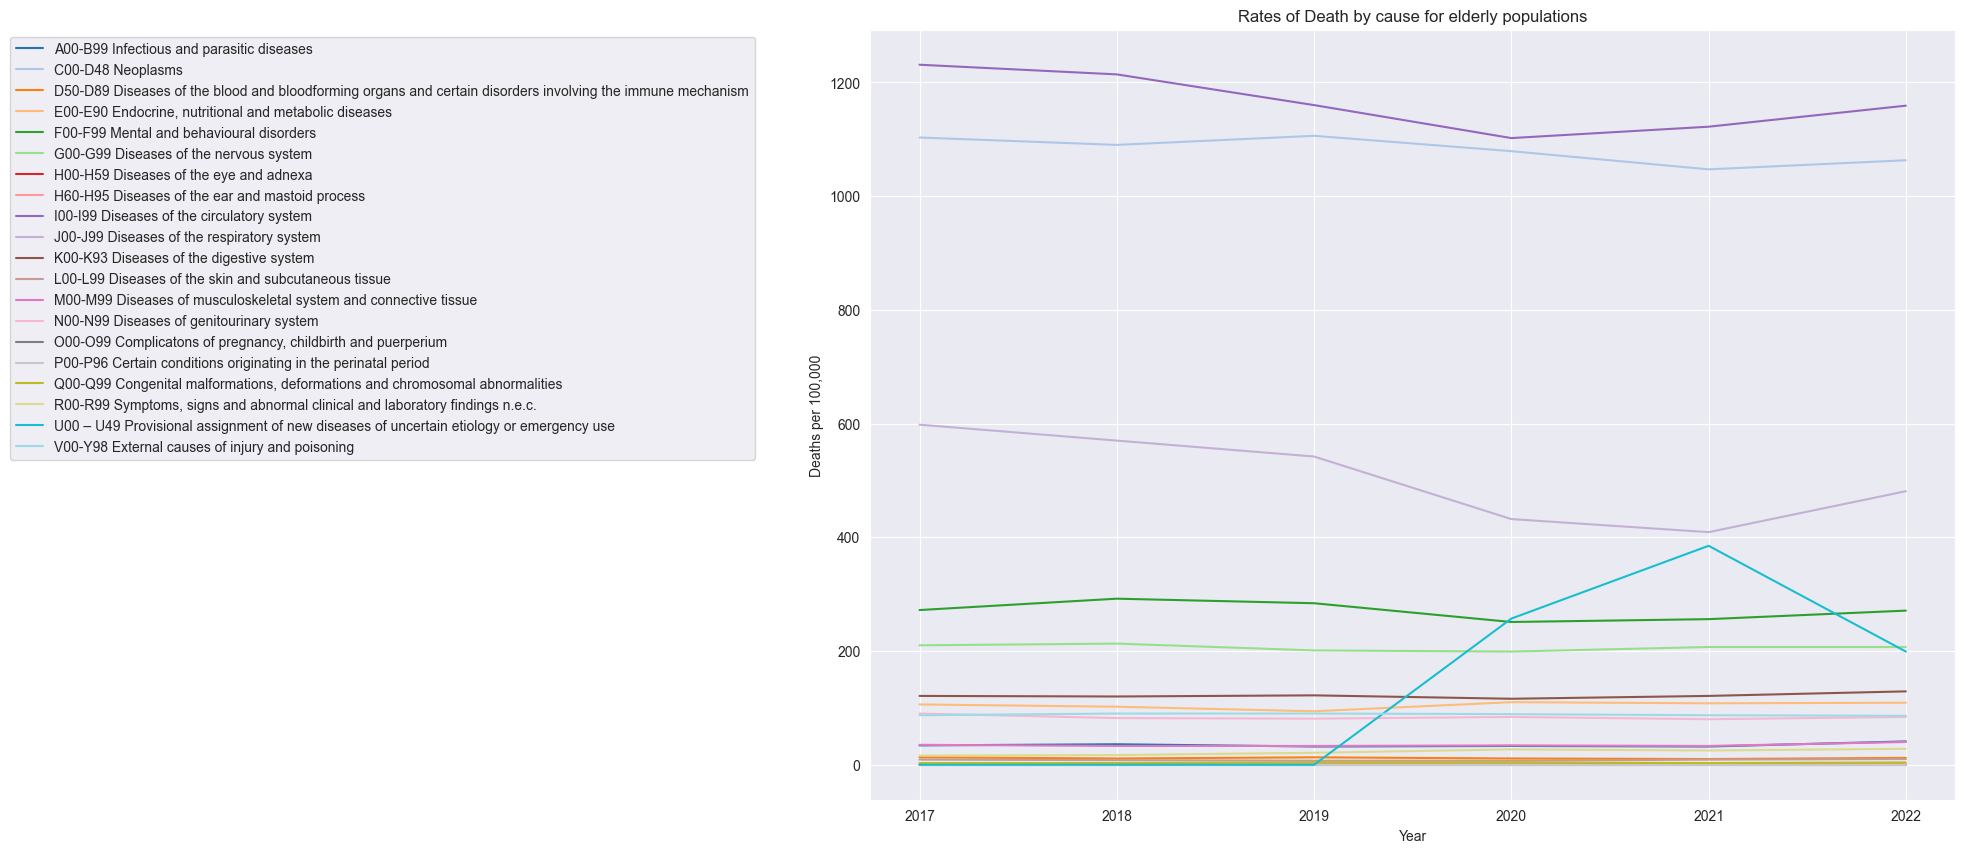

In [35]:
plt.figure(figsize=(14, 10))

colours = plt.get_cmap('tab20', len(causes_of_death) - 1)

for idx, cause in enumerate(causes_of_death[1:]):
    elderly_cause_df = elderly_df[elderly_df['Cause of Death'] == cause]
    elderly_deaths = elderly_cause_df[years].values.flatten()
    
    colour = colours(idx)
    plt.plot(years, elderly_deaths, label=cause, color=colour)

plt.title('Rates of Death by cause for elderly populations')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(-0.1, 1))
plt.show()

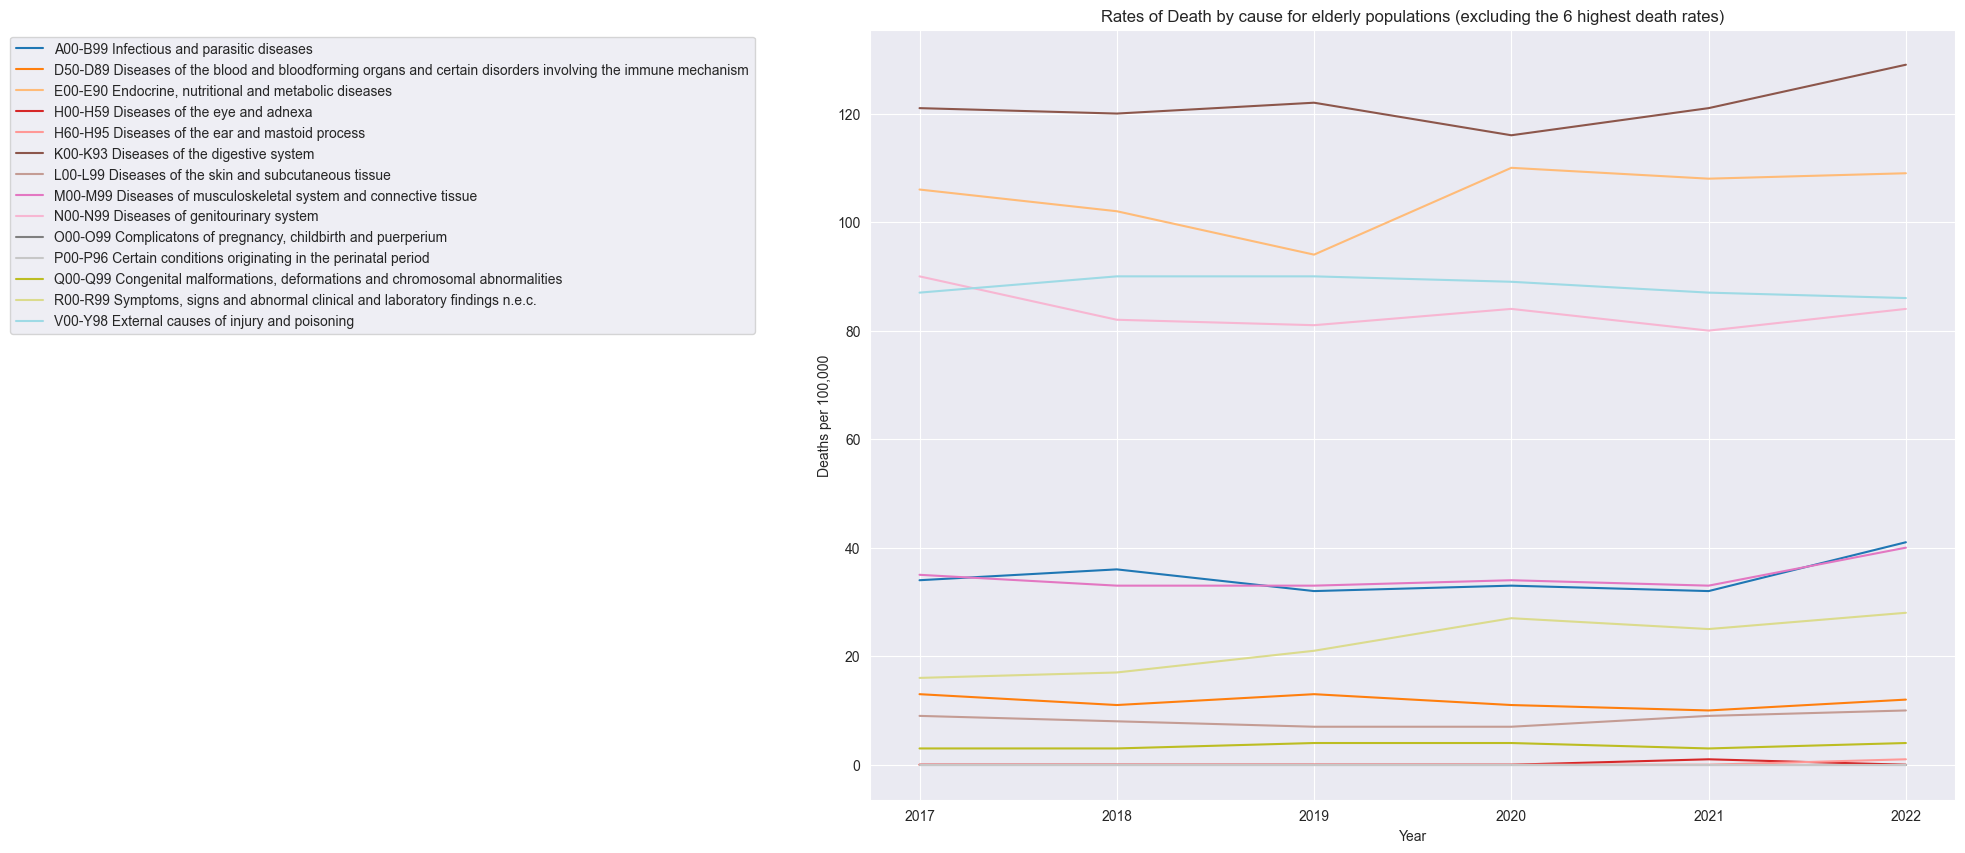

In [38]:
plt.figure(figsize=(14, 10))

colours = plt.get_cmap('tab20', len(causes_of_death) - 1)
exclusions = ['C00-D48 Neoplasms',
              'F00-F99 Mental and behavioural disorders',
              'I00-I99 Diseases of the circulatory system',
              'J00-J99 Diseases of the respiratory system',
              'G00-G99 Diseases of the nervous system',
              'U00 – U49 Provisional assignment of new diseases of uncertain etiology or emergency use']

for idx, cause in enumerate(causes_of_death[1:]):
    if cause in exclusions:
        continue
    
    elderly_cause_df = elderly_df[elderly_df['Cause of Death'] == cause]
    elderly_deaths = elderly_cause_df[years].values.flatten()
    
    colour = colours(idx)
    plt.plot(years, elderly_deaths, label=cause, color=colour)

plt.title('Rates of Death by cause for elderly populations (excluding the 6 highest death rates)')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(-0.1, 1))
plt.show()

#### Conclusions
Overall we see that generally elderly populations are more at risk for almost every single cause of death.  
Some exceptions are due to issues that do not affect elderly populations such as complications during childbirth, prenatal conditions, etc.  
- <b>Diseases of the eye, adnexa, ear, and mastoid process</b> showed no significant differences either as it can be seen that it is extremely unlikely to be fatal, with the 1 death rate in 2021, and 2022 respectively causing a high CV which we need not worry about as this is not indicative of instability here, it just highlights a rarely fatal condition.  
- For <b>Congenital malformations, deformations and chromosomal abnormalities</b> both elderly and non-elderly populations are equally at risk.  
- The <b>Provisional assignment of new diseases of uncertain etiology or emergency use</b> category also produces interesting results as the values before 2020 are 0 for both age groups, perhaps indicating that they have only begun gathering data for this category recently. This gives it a presumably inflated CV percentage, and even though the difference in age groups isn't statistically significant, when accounting for years with nonzero data, the difference is indeed significant, with elderly populations at much higher risk.  
- <b>Complicatons of pregnancy, childbirth and puerperium</b> had the same death rate of 0 for both age groups.
- The <b>Certain conditions originating in the perinatal period</b> category placed elderly populations not at risk, significantly less than non-elderly populations which is to be expected since they are past the perinatal period.

Every other condition had elderly populations at significantly more risk than non-elderly populations, to varying degrees.  
The coefficients of variation allow us to assess the stability and see the variance of the death rates relative to each other. All the coefficients (except three) are below 25% indicating that the rate of death per 100,000 elderly people generally remains the same over the years despite changes in the population. The three exceptions are due to exceptional data, where deaths are either exceedingly rare, thus even 1 death per 100,000 leading to a abnormally high CV, or due to data collection presumable starting in 2020. Despite this, we can still conclude that the death rates remain stable.
